In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import matplotlib.dates as mdates
import scipy.stats as stats

from datetime import datetime

# I have a config file on my computer, you are going to have to add your own with the api key
from config import omdb_key



netflix_data = "resources/netflix_daily_top_10.csv"
netflix_titles_source = "resources/netflix_titles.csv"
netflix = pd.read_csv(netflix_data)
netflix_titles = pd.read_csv(netflix_titles_source)

# Create a New DataFrame That Shows Change in Rank Over Time

IMPORTANT: DO NOT RUN THIS NEXT CODE BLOCK

This is here to demonstrate how I made the netflix-daily-top-10-ranking-trends.csv file and does not need to be run again
The next code block reads from that csv file, so that one must be run

In [176]:
# This code works, but it takes a really long time to complete (like 10+ minutes)

# Here I'm trying to get a list of all the unique dates and turn them into datetime objects so I can sort them
# The intent here is to build a dataframe with all the dates in a single column and then rankings on that date for an individual show in another 
# You can probably give it a column for every show to make graphing a shows change in position over time easier
as_of_dates = netflix["As of"].unique()
as_of_datetime = []

for date in as_of_dates:
    as_of_datetime.append(datetime.strptime(date, '%Y-%m-%d'))
as_of_datetime.sort()
as_of_datetime

# Make a dictionary with the 'as of' dates and every title that appears in the dataset as a key,
# and its value being a list of that title's rank on that day

# We start first with a dictionary of empty lists
ranking_trend = {"As of": []}

# We give it an empty list for each title
for title in netflix["Title"].unique():
    ranking_trend[title] = []
ranking_trend

# We loop through every date
for date in as_of_datetime:
    
    # Add that date to our ranking_trend dictionary
    ranking_trend["As of"].append(date)
    
    # Define this as the daily top 10 on that date
    daily_top_10 = netflix.loc[netflix["As of"] == date.strftime('%Y-%m-%d')]
    
    # Loop through each title that we have
    for title in netflix["Title"].unique():
        
        is_in_top_10 = False
        # Check if that title is in today's daily top 10 by going through each line
        # Then, if found, append its rank
        for i in range(10):
            
            top_10_line = daily_top_10.iloc[i]
            if top_10_line["Title"] == title:
                ranking_trend[title].append(top_10_line["Rank"])
                
                # If we found it in the top ten then set this variable to true
                is_in_top_10 = True
        
        # If it wasn't in the top 10 then we simply add "None" to the list
        if is_in_top_10 == False:
            ranking_trend[title].append(None)
    print(f"{date} is done")
    
ranking_df = pd.DataFrame(ranking_trend)
ranking_df.set_index("As of")
ranking_df.to_csv("resources/netflix-daily-top-10-ranking-trends.csv", index=False)

In [2]:
# I found out that for some reason The Twilight Saga: Breaking Dawn had 5 extra values, so I deleted the last 5 entries
# on the list so that I turn ranking_trend to a dataframe and save it to a csv.
# Keep this in mind, if this ever comes up

This code block reads from the dataframe that was made in the last block

In [2]:
ranking_df = pd.read_csv("resources/netflix-daily-top-10-ranking-trends.csv")
ranking_df

,As of,"Tiger King: Murder, Mayhem …",Ozark,All American,Blood Father,The Platform,Car Masters: Rust to Riches,Unorthodox,Love is Blind,Badland,...,Restless,Worst Roommate Ever,Shrek 2,Battleship,Just Like Heaven,Against the Ice,The Weekend Away,Pieces of Her,Shrek,Shooter
0,2020-04-01,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-02,1.0,2.0,3.0,6.0,9.0,10.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-03,1.0,2.0,3.0,10.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-04,1.0,2.0,4.0,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-05,1.0,2.0,5.0,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,2.0,8.0,NaN,10.0,NaN,6.0,1.0,9.0,NaN
706,2022-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,3.0,8.0,NaN,NaN,NaN,7.0,1.0,9.0,NaN
707,2022-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,4.0,7.0,NaN,NaN,NaN,9.0,1.0,8.0,10.0
708,2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,5.0,9.0,NaN,NaN,NaN,NaN,1.0,10.0,8.0


# Create a DataFrame for Total Days in Top 10

In [3]:
# Here I am creating a new dataframe that contains information about how many days a given title was in the top 10

# Get the list of unique titles
titles_top_10 = netflix["Title"].unique()

# Get a list of all dates
time_period = ranking_df["As of"]

# We are going to get a list of days those titles were in the top 10, we start with an empty list
max_days_in_top_10 = {
    "Title": [],
    "Max Days in Top 10": [],
    "Type": [],
    "Netflix Exclusive": []
}

# Loop through the titles and get the max number of days it was in the top 10 (This would be the total number of days it shows up)
for title in titles_top_10:
    max_days_in_top_10["Title"].append(title)
    max_days_in_top_10["Max Days in Top 10"].append(netflix["Days In Top 10"].loc[netflix["Title"] == title].max())
    max_days_in_top_10["Type"].append(netflix["Type"].loc[netflix["Title"] == title].iloc[0])
    max_days_in_top_10["Netflix Exclusive"].append(netflix["Netflix Exclusive"].loc[netflix["Title"] == title].iloc[0])

max_days_in_top_10

# Turn that into a dataframe
max_days_in_top_10_df = pd.DataFrame(max_days_in_top_10)
max_days_in_top_10_df

,Title,Max Days in Top 10,Type,Netflix Exclusive
0,"Tiger King: Murder, Mayhem …",37,TV Show,Yes
1,Ozark,89,TV Show,Yes
2,All American,66,TV Show,NaN
3,Blood Father,7,Movie,NaN
4,The Platform,10,Movie,Yes
...,...,...,...,...
640,Against the Ice,2,Movie,Yes
641,The Weekend Away,6,Movie,Yes
642,Pieces of Her,7,TV Show,Yes
643,Shrek,7,Movie,NaN


In [4]:
# I want to split the data up between netflix exclusives vs. non-exclusives and tv shows vs movies,
# so I define a series of variables that are lists of show titles that fit the criteria

# Get a list of all the TV Shows in the set
shows = netflix["Title"].loc[netflix["Type"] == 'TV Show'].unique()

# Then a list of all Movies
movies = netflix["Title"].loc[netflix["Type"] == 'Movie'].unique()

# Stand-up and Concerts are next, although I never end up using them
stand_up = netflix["Title"].loc[netflix["Type"] == 'Stand-Up Comedy'].unique()
concert = netflix["Title"].loc[netflix["Type"] == 'Concert/Perf…'].unique()

# Here I get a list of all netflix/non-netflix nows/movies
shows_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'TV Show') & (netflix["Netflix Exclusive"] == "Yes")].unique()
shows_not_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'TV Show') & (netflix["Netflix Exclusive"] != "Yes")].unique()
movies_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'Movie') & (netflix["Netflix Exclusive"] == "Yes")].unique()
movies_not_netflix_exclusive = netflix["Title"].loc[(netflix["Type"] == 'Movie') & (netflix["Netflix Exclusive"] != "Yes")].unique()

print(f"""
Number of Shows  : {len(shows)}
Number of Movies : {len(movies)}
Number of Stand Up : {len(stand_up)}
Number of Concerts : {len(concert)}
""")



Number of Shows  : 283
Number of Movies : 355
Number of Stand Up : 6
Number of Concerts : 1



In [5]:
# Now I create a pandas series of the mean ranking of shows/movies/etc.

shows_rank = netflix["Rank"].loc[netflix["Type"] == 'TV Show'].mean()
movies_rank = netflix["Rank"].loc[netflix["Type"] == 'Movie'].mean()
stand_up_rank = netflix["Rank"].loc[netflix["Type"] == 'Stand-Up Comedy'].mean()
concert_rank = netflix["Rank"].loc[netflix["Type"] == 'Concert/Perf…'].mean()

print(f"""
Average Rank of Shows  : {shows_rank}
Average Rank of Movies : {movies_rank}
Average Rank of Stand Up : {stand_up_rank}
Average Rank of Concerts : {concert_rank}
""")


Average Rank of Shows  : 5.422177237966712
Average Rank of Movies : 5.635005744925316
Average Rank of Stand Up : 5.439024390243903
Average Rank of Concerts : 3.5



In [7]:
# Here I pull data from the ranking_df dataframe to make a new dataframe that will show the changes of rank of the different
# categories over time

shows_mean_ranking = ranking_df[shows].mean(axis=1)
movies_mean_ranking = ranking_df[movies].mean(axis=1)
stand_up_mean_ranking = ranking_df[stand_up].mean(axis=1)
concert_mean_ranking = ranking_df[concert].mean(axis=1)

netflix_shows_mean_ranking = ranking_df[shows_netflix_exclusive].mean(axis=1)
non_netflix_shows_mean_ranking = ranking_df[shows_not_netflix_exclusive].mean(axis=1)
netflix_movies_mean_ranking = ranking_df[movies_netflix_exclusive].mean(axis=1)
non_netflix_movies_mean_ranking = ranking_df[movies_not_netflix_exclusive].mean(axis=1)

daily_top_10_mean_ranking_df = pd.DataFrame(data={
    "As of":time_period,
    "Shows":shows_mean_ranking,
    "Movies":movies_mean_ranking,
    "Stand-up":stand_up_mean_ranking,
    "Concert":concert_mean_ranking,
    "Netflix Shows":netflix_shows_mean_ranking,
    "Non Netflix Exclusive Shows":non_netflix_shows_mean_ranking,
    "Netflix Movies":netflix_movies_mean_ranking,
    "Non Netflix Movies":non_netflix_movies_mean_ranking
})

In [41]:
daily_top_10_mean_ranking_df.median()

C:\Users\wallh\AppData\Local\Temp/ipykernel_3448/158785766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_top_10_mean_ranking_df.median()


Shows                          5.428571
Movies                         5.666667
Stand-up                       4.000000
Concert                        3.500000
Netflix Shows                  5.000000
Non Netflix Exclusive Shows    6.333333
Netflix Movies                 5.000000
Non Netflix Movies             6.666667
dtype: float64

Text(0, 0.5, 'Position in the Daily Top 10')

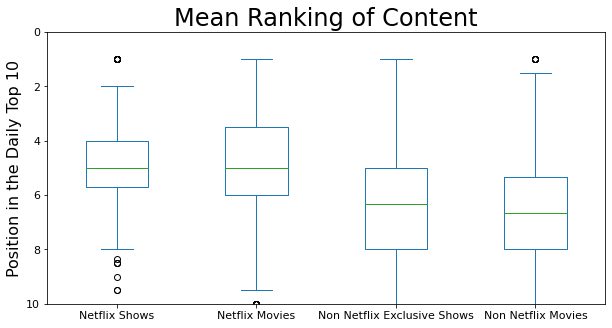

In [56]:
ax1 = daily_top_10_mean_ranking_df[["Netflix Shows","Netflix Movies", "Non Netflix Exclusive Shows", "Non Netflix Movies"]].plot(kind="box", figsize=(10,5), ylim=(10,0), fontsize=11)
ax1.set_title("Mean Ranking of Content", fontdict={'fontsize':24})
ax1.set_ylabel("Position in the Daily Top 10", fontdict={'fontsize':16})

In [13]:
# Remove Cocomelon since it's such a huge outlier
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Title"] != "Cocomelon"]

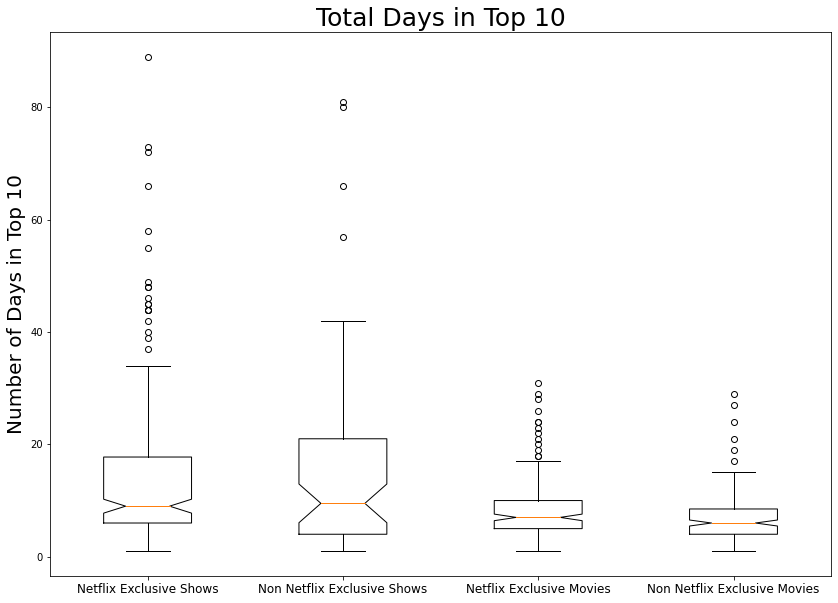

In [54]:
box_netflix_show = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] == "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "TV Show")]
box_netflix_movie = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] == "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "Movie")]
box_non_netflix_show = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] != "Yes") & 
                                                           (max_days_in_top_10_df["Type"] == "TV Show")]
box_non_netflix_movie = max_days_in_top_10_df["Max Days in Top 10"].loc[(max_days_in_top_10_df["Netflix Exclusive"] != "Yes") & 
                                                            (max_days_in_top_10_df["Type"] == "Movie")]
box_titles = ["Netflix Exclusive Shows",  "Non Netflix Exclusive Shows", "Netflix Exclusive Movies", "Non Netflix Exclusive Movies"]

fig1, ax1 = plt.subplots(figsize=(14,10))
ax1.set_title("Total Days in Top 10", fontsize=25)
ax1.set_ylabel("Number of Days in Top 10", fontsize=20)
ax1.boxplot([box_netflix_show, box_non_netflix_show, box_netflix_movie, box_non_netflix_movie], box_titles)
plt.xticks([1,2,3,4], box_titles, fontsize=12)


plt.show()

In [35]:
# We filter out Cocomelon since its such a huge outlier
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Title"] != "Cocomelon"]

# We are only concerned with movies and tv shows so we filter only for those
max_days_in_top_10_df = max_days_in_top_10_df.loc[(max_days_in_top_10_df["Type"] == "TV Show") | (max_days_in_top_10_df["Type"] == "Movie")]

max_days_in_top_10_df.fillna("No", inplace=True)
max_days_in_top_10_df = max_days_in_top_10_df.loc[max_days_in_top_10_df["Max Days in Top 10"] != "No"]
max_days_grouped = max_days_in_top_10_df.groupby(["Netflix Exclusive", "Type"])
max_days_grouped.median()

Max Days in Top 10
Netflix Exclusive Type                       
No                Movie                   6.0
                  TV Show                 9.5
Yes               Movie                   7.0
                  TV Show                 9.0

In [12]:
max_days_grouped.mean()

Max Days in Top 10
Netflix Exclusive Type                       
No                Movie              6.468571
                  TV Show           15.750000
Yes               Movie              8.238889
                  TV Show           14.328829

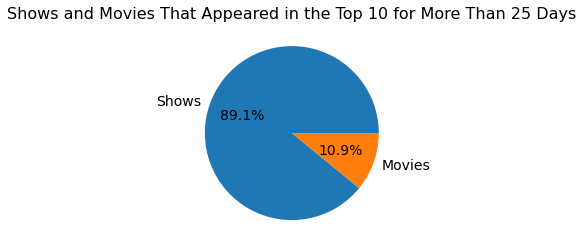

In [26]:
# We filter by things that were in the top 10 for more than 25 days

shows_in_top_10_for_more_than_25_days = max_days_in_top_10_df.loc[max_days_in_top_10_df["Max Days in Top 10"] >= 25]

show_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "TV Show"])
movies_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "Movie"])
netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] == "Yes"])
non_netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] != "Yes"])

fig1, ax1 = plt.subplots()
ax1.pie([show_pie, movies_pie], labels=["Shows", "Movies"], autopct='%1.1f%%', textprops={'fontsize':14})
plt.title("Shows and Movies That Appeared in the Top 10 for More Than 25 Days", fontsize=16)
plt.show()


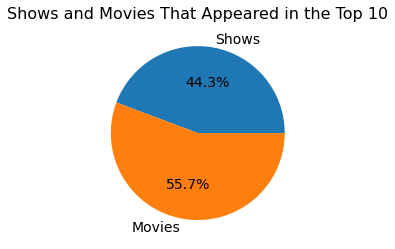

In [57]:
# I want to take a look at the overall distribution of movies and shows

shows_in_top_10_for_more_than_25_days = max_days_in_top_10_df

show_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "TV Show"])
movies_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Type"] == "Movie"])
netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] == "Yes"])
non_netflix_pie = len(shows_in_top_10_for_more_than_25_days.loc[shows_in_top_10_for_more_than_25_days["Netflix Exclusive"] != "Yes"])

fig1, ax1 = plt.subplots()
ax1.pie([show_pie, movies_pie], labels=["Shows", "Movies"], autopct='%1.1f%%', textprops={'fontsize':14})
plt.title("Shows and Movies That Appeared in the Top 10", fontsize=16)
plt.show()
